# python包sympy在物理工程和数学的应用导论

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

# Introduction
设定一个变量x如下

In [2]:
x=smp.symbols('x')
x

x

In [12]:
print(x **2)
print(smp.cos(x))
y=smp.sin(x)
y

x**2
cos(x)


sin(x)

## 复习：这样利用sympy就可以构建很多方程了

In [36]:
y=x**2+4*x+3
print(y)

z=y**2
print(z)

#因式分解
fac=z.factor()
print(fac)

#扩展多项式
expd=z.expand()
print(expd)

z.as_poly()

x**2 + 4*x + 3
(x**2 + 4*x + 3)**2
(x + 1)**2*(x + 3)**2
x**4 + 8*x**3 + 22*x**2 + 24*x + 9


Poly(x**4 + 8*x**3 + 22*x**2 + 24*x + 9, x, domain='ZZ')

使用 ```smp.solve(f,x)``` 时，总会去找所有使得函数$f(x)=0$的解

In [38]:
#解方程  注意 五次多项式以上无根式解
smp.solve(z,x) 

[-3, -1]

In [39]:
smp.solve(smp.sin(x),x)

[0, pi]

### 注：在整个后期方程的变化变得复杂之前，如果能够定义变量的数据类型就尽早定义，否则后期复杂操作会导致sympy挤满内存造成内存泄露

In [50]:
x=smp.symbols('x')
res =smp.solve(x**2+1,x) 
print(res)
x=smp.symbols('x',real=True)
res=smp.solve(x**2+1,x) 
print(res) 

[-I, I]
[]


In [51]:
x=smp.symbols('x',real=True )
res =smp.solve(x +4,x) 
print(res)
#注意这里指定了正数，该正负指定对于虚数i无用
x=smp.symbols('x',real=True,positive=True)
res =smp.solve(x +4,x) 
print(res)

[-4]
[]


可指定多个变量

In [4]:
x,y,z=smp.symbols('x y z')
F= x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

In [65]:
#此时需要寻找F=0的x的解 使用 yz表达
x_sols=smp.solve(F,x)
print(x_sols)
y_sols=smp.solve(F,y)
print(y_sols)
z_sols=smp.solve(F,z)
print(z_sols)

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]
[-x**2/sin(z)]
[asin(x**2/y) + pi, -asin(x**2/y)]


然后把方程转为数值函数，在matplot上显示出来

In [69]:
expr= z_sols[0]
print(expr)
#给予函数一组变量数字用以计算
expr_f=smp.lambdify([x,y],expr)
expr_f(1,2) 

asin(x**2/y) + pi


3.6651914291880923

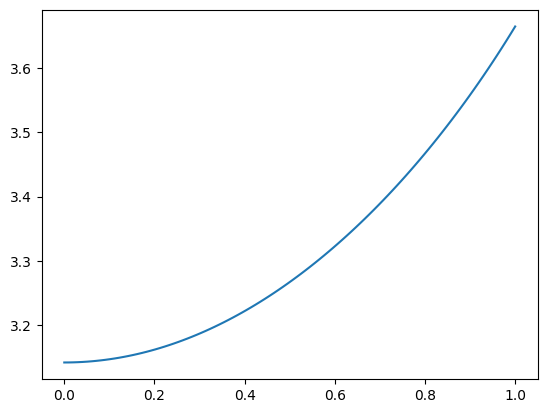

In [74]:
x_num=np.linspace(0,1,100)
y_num=2
plt.plot(x_num,expr_f(x_num,y_num))
plt.show()

多元方程可以对变量做赋值，甚至于替换变量

In [5]:
print(F)
res=F.subs([(y,smp.cos(z))])
print(res)
res=F.subs([(y,smp.cos(z)),(z,smp.pi/2)])
print(res)

x**2 + y*sin(z)
x**2 + sin(z)*cos(z)
x**2


# 样例
一个下落的物体，和一个平台，都在重力加速度影响下下落，其方程如下
\
Object:$h_o(t)=h_0-v_0t-\frac12gt^2$
\
Platform:$h_p(t)=v_pt+\frac12qt^2$
\
找出一个初始速度 $v_0$ 使得物体和平台在等速的时候相撞；
\
根据条件碰撞时高度相同，速度也相同，那么我们要解开两个联立的等式：\
$h_o(t)=h_p(t)$\
$\frac{dh_0}{d_t}(t)=-\frac{dh_p}{dt}(t)$\
由于在sympy中是右侧为0的方程解法，那么处理一下\
$h_o(t)-h_p(t)=0$\
$\frac{dh_0}{d_t}(t)+\frac{dh_p}{dt}(t)=0$\
\
那么可以开始编程

In [6]:
t,h0,v0,g,vp,q=smp.symbols('t h_0 v_0 g v_p q',real=True,positive=True)


In [9]:
#Rational表达严格数学上的分数含义 而非计算机的除法  可保证精度
h0t=h0-v0*t-smp.Rational(1,2)*g*t**2
dh0_dt=g*t-v0
hpt=vp*t+smp.Rational(1,2)*g*t**2
dhp_dt=vp+q*t

In [10]:
eq1=h0t-hpt
eq2=dh0_dt+dhp_dt

In [11]:
#连立方程解法   并取出第一对解
t_collide,v_initfall=smp.solve([eq1,eq2],[t,v0])[0]

In [13]:
smp.solve([eq1,eq2],[t,v0])[0][0]

(g*v_p/(2*g + q) - v_p - (g + q)*sqrt(2*g*h_0 + h_0*q + v_p**2)/(2*g + q))/(g + q)

In [14]:
v_initfall

g*v_p/(2*g + q) - (g + q)*sqrt(2*g*h_0 + h_0*q + v_p**2)/(2*g + q)

In [15]:
dh0_dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(-2*g*v_p + q*sqrt(2*g*h_0 + h_0*q + v_p**2))/(2*g + q)

In [17]:
dhp_dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(2*g*v_p - q*sqrt(2*g*h_0 + h_0*q + v_p**2))/(2*g + q)